This code loads the errors in ITCZ state as a function of ITCZ state, month, and dataset (CMIP6 models and reanalyses) as a funcutoin of ocean basin. The errors are then plotted in four ocean basins as one figure.

In [15]:
#Author: Alex Gonzalez
#Date: November 2025
#Paper: JGR-Atmospheres

Figure S1. ITCZ state error in CMIP6 models (1980–2014) compared to IMERG combined
microwave and IR observations (1998–2024) averaged over all months and over all five ITCZ states
(black curves) and over only nITCZ (transparent green curves), sITCZ (transparent gold curves),
aITCZ (transparent blue curves), dITCZ (transparent red curves), and eITCZ (transparent gray
curves) for the a) East Pacific Ocean (90◦W–135◦W), b) Atlantic Ocean (5◦E–40◦W), c) Indian
Ocean (50◦E–95◦E), and d) Central Pacific Ocean (180◦W–135◦) regions. The cyan shading
represents the range of ITCZ state error of all reanalyses averaged over all five ITCZ states
(1998–2024). For panel a, the vertical gray lines denote the cutoffs separating the three CMIP6
model groups: top models (n=2), intermediate models (n=12), and bottom models (n=11) used
in this study for the east Pacific region.

In [16]:
import numpy as np 
import matplotlib.pyplot as plt
import xarray as xr
#from netCDF4 import Dataset
import pandas as pd
#import netCDF4

from cartopy import config

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker

from mpl_toolkits.axes_grid1 import ImageGrid

In [17]:
region = ['EastPac','Atlantic','Indian','CentPac']#'WestPac']
nreg = len(region)
region_str = [r'East Pacific Ocean ($90^{\circ}-135^{\circ}$W)',r'Atlantic Ocean ($40^{\circ}$W$-5^{\circ}$E)',r'Indian Ocean ($50^{\circ}-95^{\circ}$E)',r'Central Pacific Ocean ($180^{\circ}-135^{\circ}$W)']#'West Pacific Ocean (150E-1655W)']

In [18]:
figfolder = '/home/alex.gonzalez/CMIP6_ITCZ_state_project/figures/methods_paper/revision/'
figname = 'ITCZ_state_CMIP6_ranking_allregions_Cent.pdf'

In [19]:
dri = '/home/alex.gonzalez/CMIP6_ITCZ_state_project/scripts/methods_paper/data/'
fn = 'ITCZ_errors_'+region[0]+'.nc'
data = xr.open_dataset(dri+fn, engine='netcdf4')
[ndata_CMIP6,nmon,nitcz_state] = data['error_CMIP6'].shape
[ndata_reana,nmon,nitcz_state] = data['error_reana'].shape
coords_CMIP6 = data['error_CMIP6'].coords
dataset_CMIP6 = coords_CMIP6['dataset_CMIP6']
month = coords_CMIP6['month']
itcz_state = coords_CMIP6['itcz_state'].values
dims_CMIP6 = data['error_CMIP6'].dims

coords_reana = data['error_reana'].coords
dataset_reana = coords_reana['dataset_reana']
dims_reana = data['error_reana'].dims

data_CMIP6 = np.zeros((ndata_CMIP6,nmon,nitcz_state,nreg))
data_reana = np.zeros((ndata_reana,nmon,nitcz_state,nreg))

dataset_CMIP6_2D = np.empty((ndata_CMIP6,nreg),dtype='U20')
for iregion in range(0,nreg):
    fn = 'ITCZ_errors_'+region[iregion]+'.nc'
    data = xr.open_dataset(dri+fn, engine='netcdf4')
    data_CMIP6[:,:,:,iregion] = data['error_CMIP6']
    dataset_CMIP6_2D[:,iregion] = data['error_CMIP6']['dataset_CMIP6']
    data_reana[:,:,:,iregion] = data['error_reana']

In [20]:
 dataset_CMIP6_2D

array([['CNRM-CM6-1-HR', 'CAMS-CSM1-0', 'MRI-ESM2-0', 'CMCC-CM2-SR5'],
       ['BCC-CSM2-MR', 'EC-Earth3-AerChem', 'CESM2', 'SAM0-UNICON'],
       ['CAMS-CSM1-0', 'MPI-ESM1-2-HR', 'CESM2-WACCM', 'CMCC-ESM2'],
       ['CMCC-CM2-HR4', 'EC-Earth3-Veg-LR', 'MPI-ESM1-2-HR',
        'CNRM-CM6-1-HR'],
       ['EC-Earth3-Veg-LR', 'EC-Earth3', 'EC-Earth3-CC', 'CMCC-CM2-HR4'],
       ['EC-Earth3-CC', 'EC-Earth3-CC', 'EC-Earth3-Veg', 'E3SM-1-0'],
       ['EC-Earth3-AerChem', 'EC-Earth3-Veg', 'EC-Earth3', 'MRI-ESM2-0'],
       ['EC-Earth3-Veg', 'FGOALS-f3-L', 'E3SM-1-0', 'BCC-CSM2-MR'],
       ['EC-Earth3', 'CNRM-CM6-1-HR', 'E3SM-2-0', 'HadGEM3-GC31-MM'],
       ['E3SM-1-0', 'E3SM-2-0', 'EC-Earth3-AerChem', 'TaiESM1'],
       ['GFDL-ESM4', 'MRI-ESM2-0', 'E3SM-2-0-NARRM', 'CESM2'],
       ['TaiESM1', 'E3SM-2-0-NARRM', 'EC-Earth3-Veg-LR', 'NorESM2-MM'],
       ['CMCC-CM2-SR5', 'GFDL-ESM4', 'HadGEM3-GC31-MM', 'MPI-ESM1-2-HR'],
       ['E3SM-2-0-NARRM', 'BCC-CSM2-MR', 'GFDL-CM4', 'EC-Earth3-AerChem'],

In [21]:
data_CMIP6_xr = xr.DataArray(data_CMIP6,coords=[dataset_CMIP6,month,itcz_state,region],dims=[dims_CMIP6[0],dims_CMIP6[1],dims_CMIP6[2],'region'])

In [22]:
data_reana_xr = xr.DataArray(data_reana,coords=[dataset_reana,month,itcz_state,region],dims=[dims_reana[0],dims_reana[1],dims_reana[2],'region'])

In [23]:
data_CMIP6_xr

<xarray.DataArray (dataset_CMIP6: 25, month: 12, itcz_state: 5, region: 4)>
array([[[[71.9, 22. ,  0.7,  7.5],
         [ 2.7, 61.6, 18.1,  9.8],
         [15.2, 31.5, 22.5, 32.6],
         [56.1,  0. ,  4.5, 52.1],
         [ 2. ,  8.1, 45.8,  2.1]],

        [[63.1, 14.3,  0.1,  8.4],
         [ 6.5, 71.7,  8.9, 13.3],
         [ 5.8, 46.1, 17.9, 31.3],
         [65.8,  0. ,  1.5, 55. ],
         [ 3.5, 11.4, 10.7,  2. ]],

        [[31.4, 14.2,  0.2,  8.6],
         [10.7, 52.1, 13.3, 14.7],
         [16.5, 36. , 20.6, 28.7],
         [59.1,  0.1,  0.3, 50.2],
         [ 0.5,  1.7,  7.9,  1.7]],

        ...,

...

        ...,

        [[ 0.5,  0.2,  3.9,  1.8],
         [ 0. ,  0. ,  2.8,  1.9],
         [ 0.6,  0.2,  7.5, 15.7],
         [ 0.1,  0. ,  5.4, 19.6],
         [ 0. ,  0. ,  6.1,  3.7]],

        [[ 1.7,  2.6,  8.3,  1.5],
         [ 0. ,  0. ,  4. ,  4.2],
         [ 1.9,  6.2,  7.5, 21.7],
         [ 0.2,  0. ,  5.8, 33.3],
         [ 0. ,  3.5,  8.9,  5.9]],

        [[ 3. , 28.7,  2.8,  3.7],
         [ 0. ,  0.2,  6.9,  6.4],
         [ 3.2, 11.6,  0.8, 14.6],
         [ 0.5,  0. ,  7.6, 26.9],
         [ 0.1, 17. , 10.9,  9.6]]]])
Coordinates:
  * dataset_CMIP6  (dataset_CMIP6) <U17 'CNRM-CM6-1-HR' ... 'NorESM2-MM'
  * month          (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * itcz_state     (itcz_state) <U5 'nITCZ' 'sITCZ' 'aITCZ' 'dITCZ' 'eITCZ'
  * region         (region) <U8 'EastPac' 'Atlantic' 'Indian' 'CentPac'

In [24]:
prc_ITCZ_CMIP6_errors_all_plt = data_CMIP6_xr.mean(dim=('itcz_state')).mean(dim=('month'))
prc_ITCZ_CMIP6_errors_plt = data_CMIP6_xr.mean(dim=('month'))

In [25]:
prc_ITCZ_reana_errors_plt = data_reana_xr.mean(dim=('itcz_state')).mean(dim=('month'))
prc_ITCZ_reana_errors_min = prc_ITCZ_reana_errors_plt.min(dim=('dataset_reana'))
prc_ITCZ_reana_errors_max = prc_ITCZ_reana_errors_plt.max(dim=('dataset_reana'))

In [26]:
prc_ITCZ_CMIP6_errors_plt

<xarray.DataArray (dataset_CMIP6: 25, itcz_state: 5, region: 4)>
array([[[4.20916667e+01, 4.40500000e+01, 1.00000000e+01, 1.75333333e+01],
        [1.88333333e+00, 2.18250000e+01, 9.21666667e+00, 6.47500000e+00],
        [1.27750000e+01, 2.90833333e+01, 3.73000000e+01, 2.69250000e+01],
        [3.34666667e+01, 6.66666667e-02, 5.51666667e+00, 5.08000000e+01],
        [1.08333333e+00, 1.93000000e+01, 3.68083333e+01, 1.20000000e+00]],

       [[3.89166667e+01, 3.20166667e+01, 1.13166667e+01, 1.71833333e+01],
        [1.76166667e+01, 2.64500000e+01, 1.60583333e+01, 6.20833333e+00],
        [1.42416667e+01, 1.99666667e+01, 2.86833333e+01, 2.67083333e+01],
        [1.58250000e+01, 3.33333333e-02, 5.18333333e+00, 5.10500000e+01],
        [1.27500000e+00, 2.11250000e+01, 2.96416667e+01, 1.00833333e+00]],

       [[3.60500000e+01, 2.88250000e+01, 7.45000000e+00, 1.77750000e+01],
        [2.30166667e+01, 2.75166667e+01, 1.44083333e+01, 6.85000000e+00],
        [1.63333333e+01, 2.15500000e+01, 2.60333333e+01, 2.51000000e+01],
        [6.62500000e+00, 1.00000000e-01, 5.02500000e+00, 4.89750000e+01],
        [9.91666667e-01, 2.08583333e+01, 2.92083333e+01, 1.21666667e+00]],

       [[3.17250000e+01, 3.00333333e+01, 3.14166667e+00, 1.76083333e+01],
        [2.68416667e+01, 2.39750000e+01, 6.50833333e+00, 5.22500000e+00],
...
        [2.62500000e+00, 5.00000000e-02, 6.12500000e+00, 1.45500000e+01],
        [3.54166667e+00, 1.43083333e+01, 2.10083333e+01, 1.85833333e+00]],

       [[8.99166667e+00, 1.80750000e+01, 5.36666667e+00, 7.71666667e+00],
        [3.50833333e+00, 4.72500000e+00, 9.92500000e+00, 1.20500000e+01],
        [3.77500000e+00, 7.45833333e+00, 1.58000000e+01, 9.90000000e+00],
        [1.32500000e+00, 5.83333333e-02, 2.91666667e+00, 1.49833333e+01],
        [6.71666667e+00, 1.33083333e+01, 9.76666667e+00, 1.81666667e+00]],

       [[2.70833333e+00, 1.09166667e+01, 7.24166667e+00, 6.05833333e+00],
        [5.75000000e-01, 2.40000000e+00, 1.14083333e+01, 3.54166667e+00],
        [2.55000000e+00, 1.13250000e+01, 1.12000000e+01, 9.93333333e+00],
        [1.88333333e+00, 8.33333333e-02, 4.10000000e+00, 1.74166667e+01],
        [3.10833333e+00, 6.92500000e+00, 9.79166667e+00, 2.43333333e+00]],

       [[4.69166667e+00, 7.20000000e+00, 1.08000000e+01, 3.80833333e+00],
        [1.15000000e+00, 1.35833333e+00, 8.51666667e+00, 4.10000000e+00],
        [2.54166667e+00, 5.99166667e+00, 8.00000000e+00, 8.13333333e+00],
        [1.69166667e+00, 4.16666667e-02, 4.86666667e+00, 1.40583333e+01],
        [4.16666667e-01, 9.23333333e+00, 1.03833333e+01, 6.83333333e+00]]])
Coordinates:
  * dataset_CMIP6  (dataset_CMIP6) <U17 'CNRM-CM6-1-HR' ... 'NorESM2-MM'
  * itcz_state     (itcz_state) <U5 'nITCZ' 'sITCZ' 'aITCZ' 'dITCZ' 'eITCZ'
  * region         (region) <U8 'EastPac' 'Atlantic' 'Indian' 'CentPac'

In [27]:
colors_color_blind = ['#228833','#CCBB44','#4477AA','#EE6677','k']
ymax = prc_ITCZ_CMIP6_errors_plt.max().values*0.97
ymax

49.5185

In [28]:
panel_let = ['a','b','c','d']

In [29]:
#vlines = np.zeros((2,nreg))
#vlines[0,:] = [10.5, 6.5,  
#vlines[0,0] = 10.5

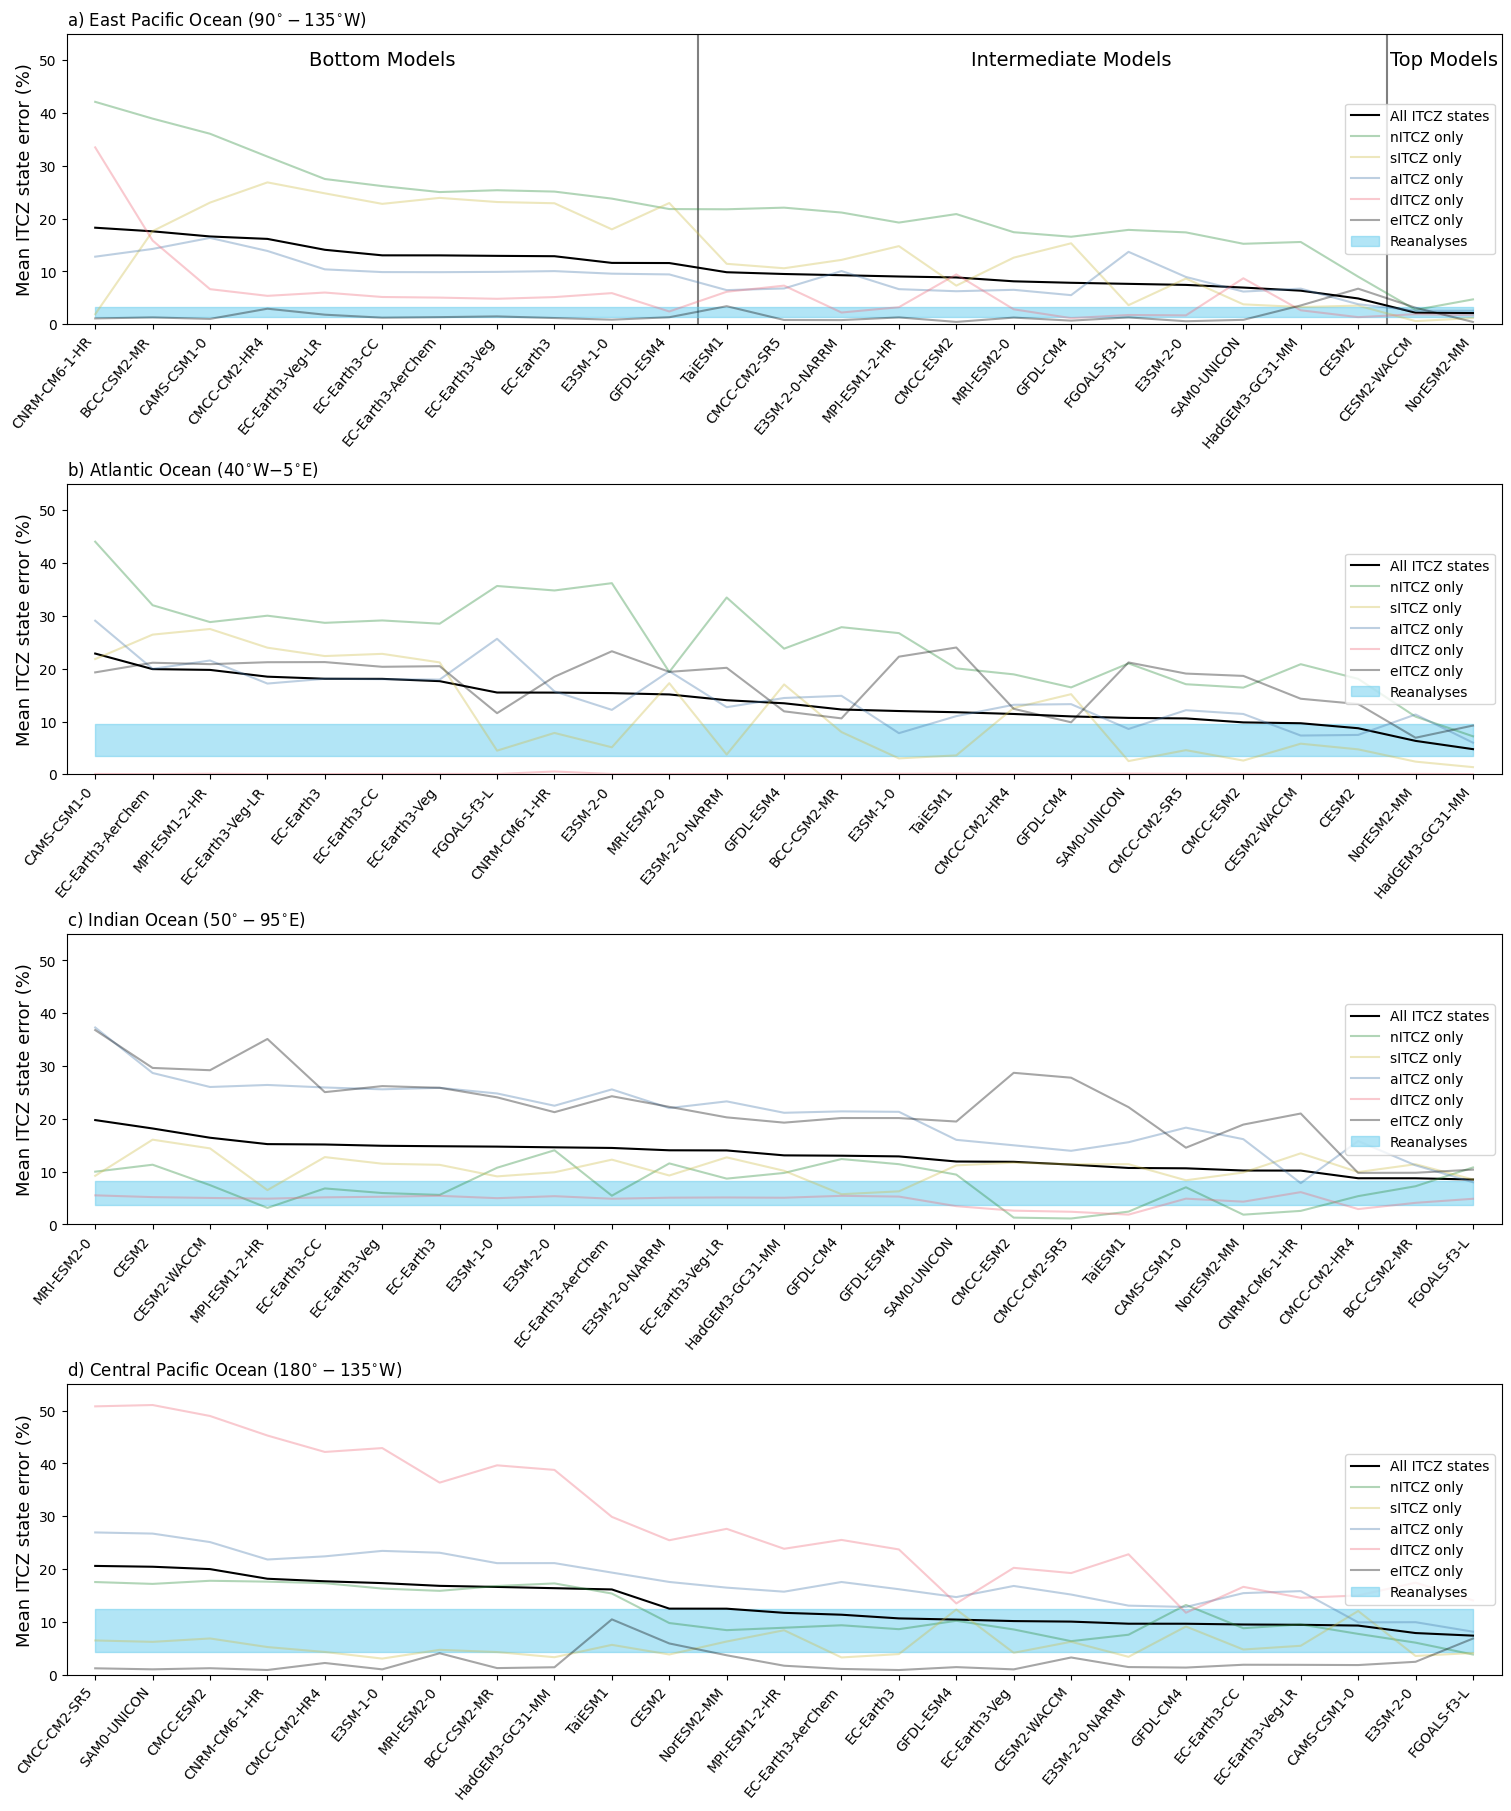

In [14]:
npan = nreg

# all of the sizes are double the size they'll be in the paper 
fig = plt.figure(figsize=(15, 18), constrained_layout='true')
#fig.suptitle(r'CMIP6 mean ITCZ state errors over the '+region_str[jj],fontsize='x-large')

for jj in range(0,npan,1):
    ax = fig.add_subplot(npan,1,jj+1)
    plt.title(panel_let[jj]+') '+region_str[jj], loc='left')#,fontsize='x-large')
    ax1 = plt.plot(dataset_CMIP6_2D[:,jj],prc_ITCZ_CMIP6_errors_all_plt[:,jj], color='k',label='All ITCZ states')
    
    for istate in range(0,nitcz_state):
        ax2 = plt.plot(dataset_CMIP6_2D[:,jj],prc_ITCZ_CMIP6_errors_plt[:,istate,jj], alpha=0.35, color=colors_color_blind[istate],label=itcz_state[istate]+' only')

    if jj == 0:
        plt.axvline(10.5,color='grey',zorder=-1)
        plt.axvline(22.5,color='grey',zorder=-1)
        ax.text(5., 50, 'Bottom Models', fontsize=14, horizontalalignment='center', verticalalignment='center')
        ax.text(17., 50, 'Intermediate Models', fontsize=14, horizontalalignment='center', verticalalignment='center')
        ax.text(23.5, 50, 'Top Models', fontsize=14, horizontalalignment='center', verticalalignment='center')

    plt.fill_between(dataset_CMIP6_2D[:,jj],prc_ITCZ_reana_errors_min[jj],prc_ITCZ_reana_errors_max[jj], color='#66CCEE', alpha=0.5, zorder=-1, label='Reanalyses')
    plt.ylabel('Mean ITCZ state error (%)',fontsize=13)
    plt.legend(loc=5)
    
    
    plt.xlim(-.5,24.5)
    plt.ylim(0,55)
    plt.xticks(rotation=50,ha='right')


#plt.savefig(figfolder+figname,bbox_inches="tight",transparent=False,dpi=150)

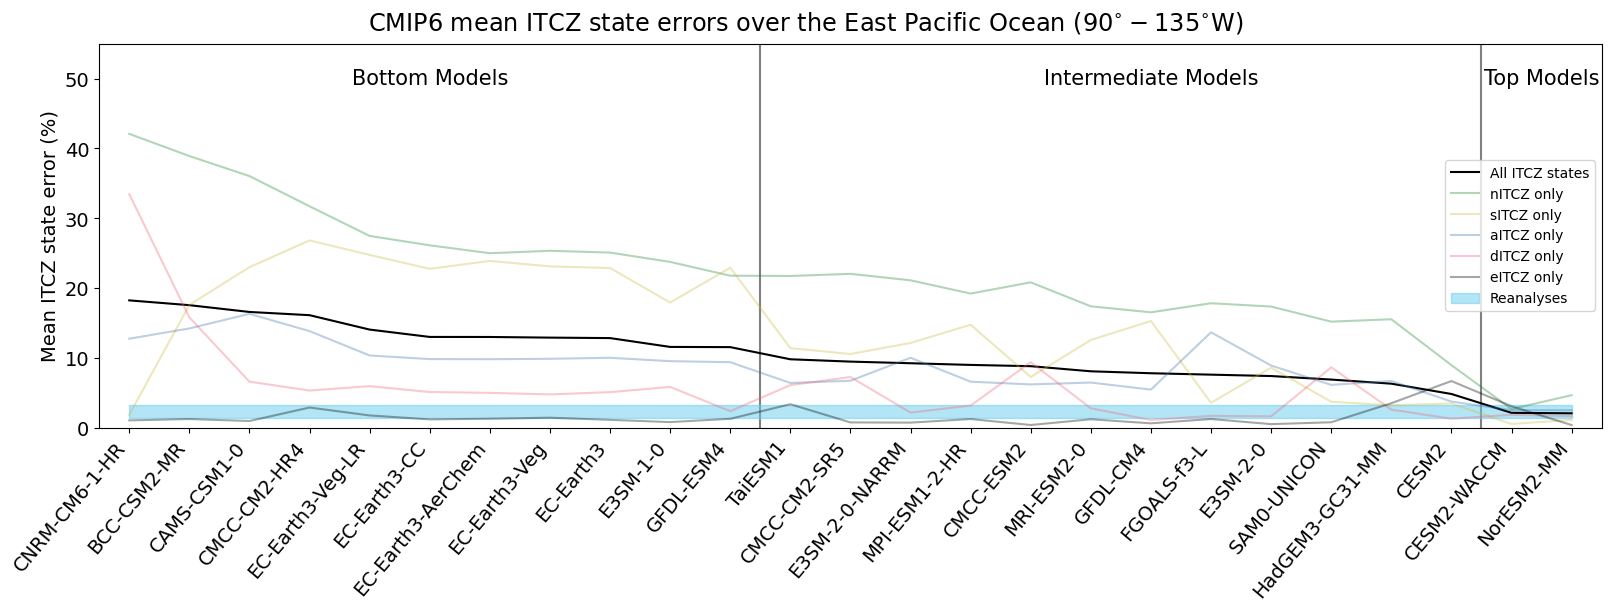

In [28]:
npan = 1

# all of the sizes are double the size they'll be in the paper 
fig = plt.figure(figsize=(16, 6), constrained_layout='true')
fig.suptitle(r'CMIP6 mean ITCZ state errors over the '+region_str[0],fontsize='xx-large')

for jj in range(0,npan,1):
    ax = fig.add_subplot(npan,1,jj+1)
    #plt.title(panel_let[jj]+') '+region_str[jj], loc='left')#,fontsize='x-large')
    ax1 = plt.plot(dataset_CMIP6_2D[:,jj],prc_ITCZ_CMIP6_errors_all_plt[:,jj], color='k',label='All ITCZ states')
    
    for istate in range(0,nitcz_state):
        ax2 = plt.plot(dataset_CMIP6_2D[:,jj],prc_ITCZ_CMIP6_errors_plt[:,istate,jj], alpha=0.35, color=colors_color_blind[istate],label=itcz_state[istate]+' only')

    if jj == 0:
        plt.axvline(10.5,color='grey',zorder=-1)
        plt.axvline(22.5,color='grey',zorder=-1)
        ax.text(5., 50, 'Bottom Models', fontsize=15, horizontalalignment='center', verticalalignment='center')
        ax.text(17., 50, 'Intermediate Models', fontsize=15, horizontalalignment='center', verticalalignment='center')
        ax.text(23.5, 50, 'Top Models', fontsize=15, horizontalalignment='center', verticalalignment='center')

    plt.fill_between(dataset_CMIP6_2D[:,jj],prc_ITCZ_reana_errors_min[jj],prc_ITCZ_reana_errors_max[jj], color='#66CCEE', alpha=0.5, zorder=-1, label='Reanalyses')
    plt.ylabel('Mean ITCZ state error (%)',fontsize=14)
    plt.legend(loc=5,fontsize='medium')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.xlim(-.5,24.5)
    plt.ylim(0,55)
    plt.xticks(rotation=50,ha='right')

figname = 'ITCZ_state_CMIP6_ranking_EastPac.pdf'
#plt.savefig(figfolder+figname,bbox_inches="tight",transparent=False,dpi=150)